Tutorial from [here](https://thedatafrog.com/en/articles/visualizing-datasets/)

In [16]:
import numpy as np
import os
from sklearn import decomposition
import matplotlib.pyplot as plt

In [17]:
data = [np.load(os.path.join("../data/preprocessed/radar", file), allow_pickle=True) for file in os.listdir("../data/preprocessed/radar/")]

In [39]:
sat = [np.load(os.path.join("../data/preprocessed/satellite/", file)) for file in os.listdir("../data/preprocessed/satellite/")]

In [40]:
raw = np.array(data)
rawSat = np.array(sat)

In [46]:
print("radar")
print(raw.shape)
print(np.max(raw))
print("satellite")
print(rawSat.shape)
print(np.max(rawSat))

radar
(275, 22244)
0.6892156862745098
satellite
(92, 11, 166, 134)
1.0


In [47]:
sat2D = rawSat.reshape(92, 11 * 166 * 134)

In [48]:
nsamples = 5000
data = raw[:nsamples]

In [49]:
data.shape

(275, 22244)

In [50]:
data = data.reshape(275, 166*134)

In [52]:
pca = decomposition.PCA(n_components=2)
view = pca.fit_transform(data)

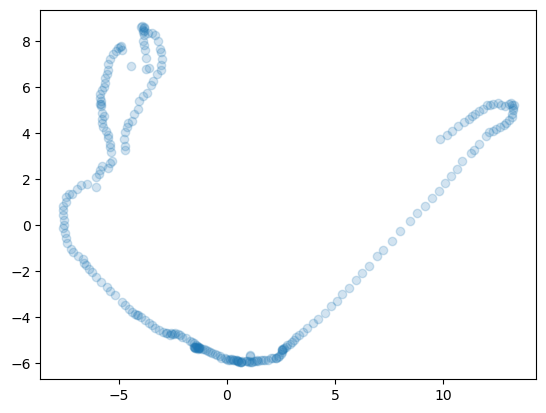

In [53]:
plt.scatter(view[:,0], view[:,1], alpha=0.2, cmap='Set1')

In [57]:
pccca = decomposition.PCA(11)
v = pca.fit_transform(sat2D)

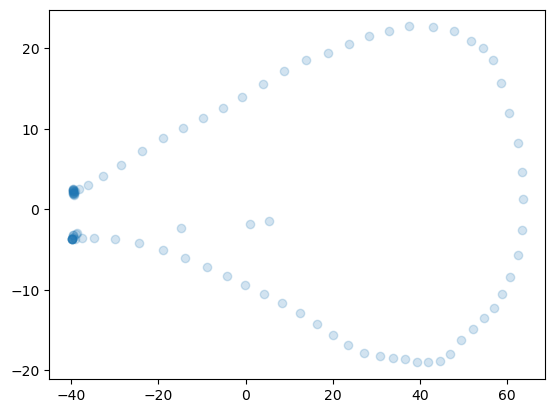

In [58]:
plt.scatter(v[:,0], v[:,1], alpha=0.2, cmap='Set1')

In [25]:

from sklearn.manifold import TSNE
view = TSNE(n_components=2, random_state=123).fit_transform(data)

Text(0, 0.5, 't-SNE-2')

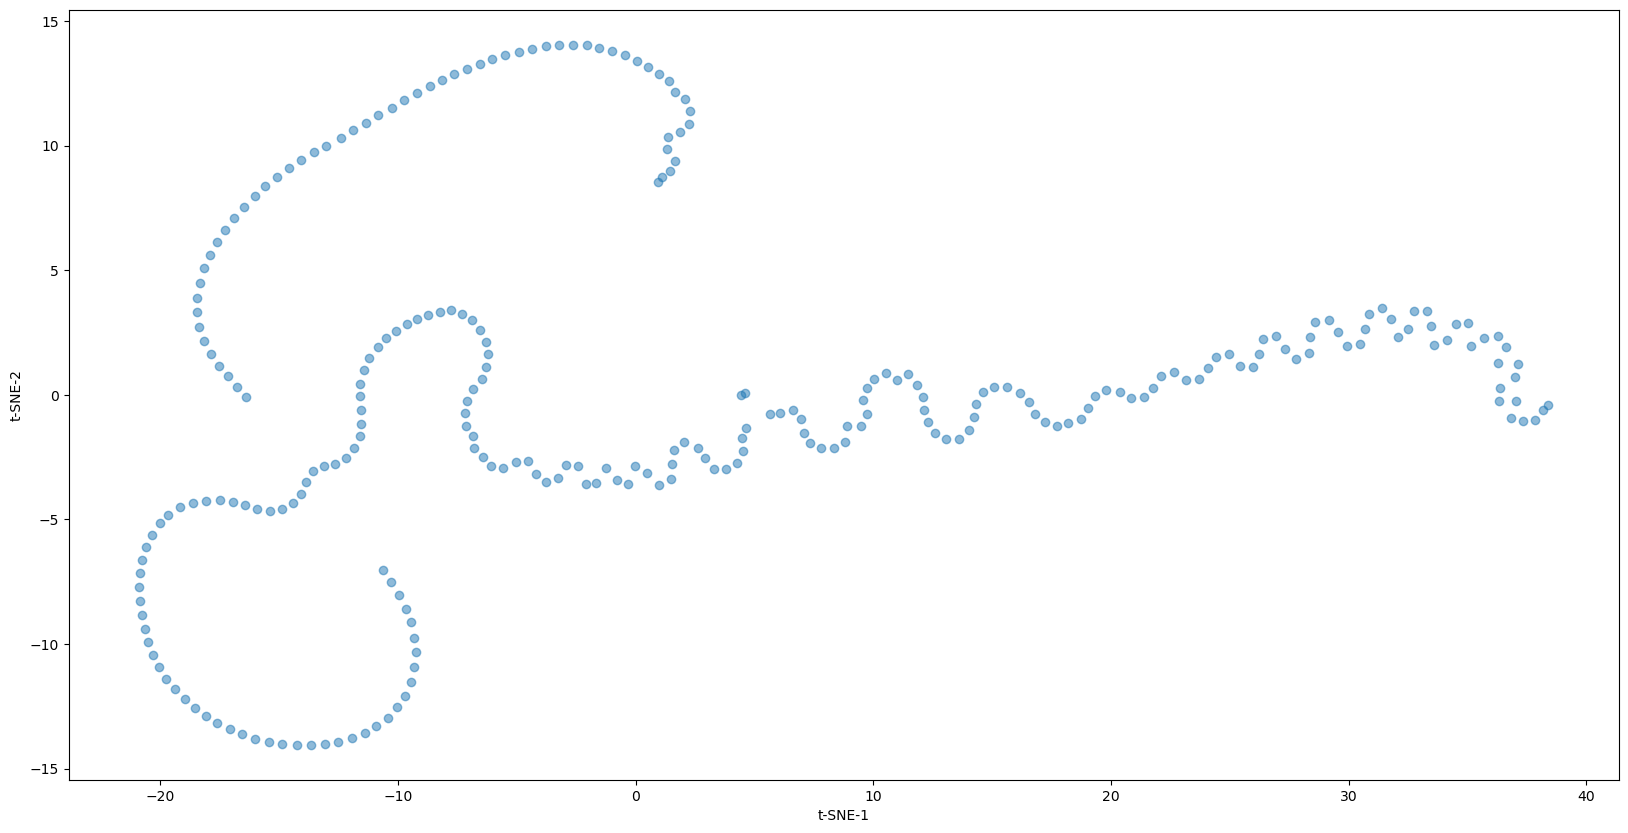

In [26]:
plt.figure(figsize=(20,10))
plt.scatter(view[:,0], view[:,1], alpha=0.5)
plt.xlabel('t-SNE-1')
plt.ylabel('t-SNE-2')

In [27]:
import umap

In [28]:
reducer = umap.UMAP()

In [29]:
embedding = reducer.fit_transform(data)
embedding.shape

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


(275, 2)

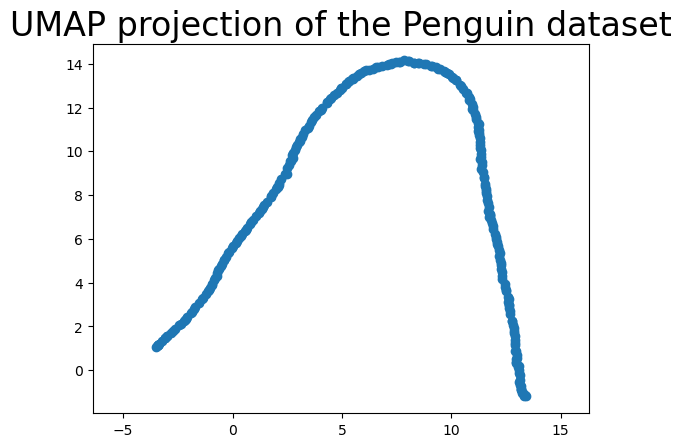

In [32]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    )
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24);